In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import scipy.integrate as integrate
from scipy.integrate import quad
              
 #parameters 
m = 1.0                                               #m=sqrt(x**2+y**2+(z/q)**2)
n = 4.0                                               #concentration parameter that describes the curvature of the profile in a radius-magnitude plot, n=4 is de Vaucoileurs profile
r_0 = 1.0                                           #characteristic radius
I_0 = 8e9                                           #central surface brightness 

 #integrate
f = lambda x: (1/np.sqrt((x**2)-(m**2)))*((-(I_0)/((r_0)*n))*(np.exp(-np.power(x/r_0, (1/n))))*(np.power(x/r_0, ((1/n)-1))));
I = quad(f, m, np.inf)

print(I)


(-1107333598.1079462, 12.926524877548218)


In [2]:
g = lambda m: quad(f, m, np.inf)[0]
print(g(1))

-1107333598.1079462


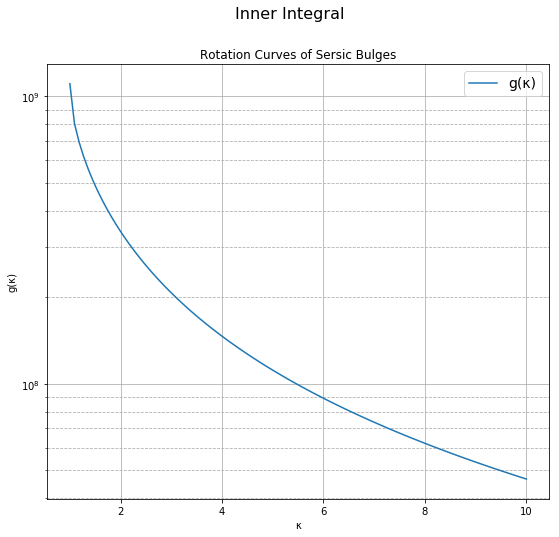

In [3]:
#adjusting the plot
fig = plt.figure(figsize=(9.0,8.0))                 #size of the plot
ax = plt.axes()
ax.grid(True)
ax.yaxis.grid(True,which='minor',linestyle='--')

ax.set_yscale('log')
x = np.linspace(1, 10, 100)                     #x from/to and line smoothness
gv = np.vectorize(g)

 #functions
plt.plot(x, -gv(x), linestyle='solid', label='g(\u03BA)')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
fig.suptitle('Inner Integral', fontsize=16)
ax.set(title='Rotation Curves of Sersic Bulges')          #labeling axes
ax.set(xlabel='\u03BA', ylabel='g(\u03BA)');

plt.legend(fontsize=14);                                      #adding legend

In [4]:
G = 6.67408e-11                                     #gravitational constant
gam = 1                                             #mass-to-light ratio
q = 0.5                                             #intrinsic axis ratio
i = 40                                              #inclination angle

C = 4*G*q*gam*I_0/(r_0*n)*(np.sqrt(np.sin(i)**2+(1/(q**2))*np.cos(i)**2))

e2 = 1-(q**2);
h = lambda a: g(a)*(m**2)/(np.sqrt((a**2)-((m**2)*(e2))))
l = lambda x: quad(h, 0, x)[0]

C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in sqrt
  
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\integrate\quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in sqrt
  if __name__ == '__main__':
C:\Users\JB\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\function_base.py:2048: RuntimeWarning: invalid value encountered in ? (vectorized)
  outputs = ufunc(*inputs)


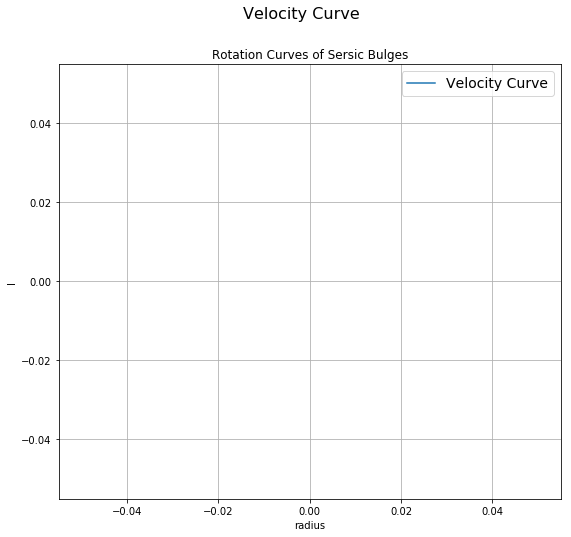

In [5]:
fig = plt.figure(figsize=(9.0,8.0))                 #size of the plot
ax2 = plt.axes()
ax2.grid(True)
ax2.yaxis.grid(True,which='minor',linestyle='--')

x = np.linspace(1, 25000, 1000)                     #x from/to and line smoothness
lv = np.vectorize(l)

 #functions
plt.plot(x, lv(x), linestyle='solid', label='Velocity Curve')          

plt.axis('tight');                                 #xmin, xmax, ymin, ymax
                                                   #or use: plt.xlim(10, 0) plt.ylim(1.2, -1.2);
                                                   #or to tighten the bounds: plt.axis('tight')
                                                   #or use: plt.axis('tight')
                                                   #plt.axis([0, 15000, 0.5e6, 2.5e6])
 #labeling plots
fig.suptitle('Velocity Curve', fontsize=16)
ax2.set(title='Rotation Curves of Sersic Bulges')          #labeling axes
ax2.set(xlabel='radius', ylabel='l');

plt.legend(fontsize=14);                                      #adding legend
